# Assignment #2 
## The goal of this assignment is to learn about the kNN.  


### Importing the data set and devideing it into dev and test dataframes.

In [1]:
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# importing data and adding colomn names.
iris_df = pd.read_csv("bezdekIris.data", names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [2]:
#checking how the data looks.
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dividing data into development set and testing set in 75:25 ratio
dev_df, test_df = train_test_split(iris_df, test_size=0.25)

## development data sample

In [4]:
print(len(dev_df))
dev_df.head()


112


,sepal length,sepal width,petal length,petal width,class
33,5.5,4.2,1.4,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


## test data sample.

In [5]:
print(len(test_df))
test_df.head()

38


,sepal length,sepal width,petal length,petal width,class
48,5.3,3.7,1.5,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica



## Euclidian disatnce finding function to use in KNN function.


In [6]:
def euclidean_distance(data1, data2):
    squared_distance = 0
    for i in range(len(data1) - 1):
        squared_distance += (int(data1[i]) - int(data2[i]))**2
    return math.sqrt(squared_distance)

## cosine_similarity finding function to use in KNN function.

In [7]:
def cosine_similarity(data1, data2):
    
    dot_product = 0
    len_data1 = 0
    len_data2 = 0
    
    for i in range(len(data1) - 1):
        dot_product += (int(data1[i]) * int(data2[i]))
        len_data1   += int(data1[i])**2
        len_data2   += int(data2[i])**2
        
    return (dot_product/math.sqrt(len_data1 * len_data2))
    

## normalized_euclidean_distance/Mahalanobis Distance finding function to use in KNN function.

In [8]:
cov_matrix = pd.DataFrame.cov(test_df)
inv_cov = np.linalg.inv(cov_matrix)

def normalized_euclidean_distance(data1, data2):
    x_y = data1[:-1].sub(data2[:-1])
    x_y_t = x_y.T
    return ((x_y_t.dot(inv_cov)).dot(x_y))

## KNN function. find the nearest 'k' neihgbors of 'data' point from 'dev_df' data frame using the 'distance_fun' function

In [9]:
def knn(data, dev_df, k, distance_fun):
    
    neighbors_distance = []
    # calculating disatance of data with each value in dev_df
    for row in dev_df.iterrows():
        # not calculating distance with itself.
        if data[0] != row[0]:
            distance = distance_fun(data[1], row[1])
            neighbors_distance.append((distance, row[1][-1]))
            
    # points are nearer if cosine similarity is heigh
    if distance_fun == cosine_similarity:
        neighbors_distance = sorted(neighbors_distance, reverse=True)
        
    # points are nearer if distance is less
    else:
        neighbors_distance = sorted(neighbors_distance)
    
    #selecting k nearest values
    k_neighbors_distance = neighbors_distance[:k]
    
    pred_class = [Counter(col).most_common(1)[0][0] for col in zip(*k_neighbors_distance)][-1]
    
    return ((data[0], pred_class))
        

## prdicting the class of data in Development data set Using KNN model using Euclidean Distance for K = [1, 3, 5, 7] and checking its accurecy

In [10]:
K = [1, 3, 5, 7]
euclid_dist_predictions = []  # to store predictions
euclid_dist_accuracy = []          # to store predictions

for k in K:
    correct = 0       # number of correct predictions
    euclid_dist_predictions.append([])
    for row in dev_df.iterrows():
        prediction = knn(row, dev_df, k, euclidean_distance)
        euclid_dist_predictions[-1].append(prediction)

        #checking if prediction is correct.
        if prediction[-1] == row[1][-1]:
            correct += 1

    euclid_dist_accuracy.append(correct/len(dev_df))
euclid_dist_accuracy

[0.8303571428571429,
 0.8928571428571429,
 0.9107142857142857,
 0.8928571428571429]

## prdicting the class of data in Development data set Using KNN model using Cosine Similarity for K = [1, 3, 5, 7] and checking its accurecy

In [11]:
cos_sim_predictions = []   # to store predictions
cos_sim_accuracy = []      # to store predictions

for k in K:
    correct = 0       # number of correct predictions
    cos_sim_predictions.append([])
    for row in dev_df.iterrows():
        prediction = knn(row, dev_df, k, cosine_similarity)
        cos_sim_predictions[-1].append(prediction)

        #checking if prediction is correct.
        if prediction[-1] == row[1][-1]:
            correct += 1

    cos_sim_accuracy.append(correct/len(dev_df))
cos_sim_accuracy

[0.8214285714285714, 0.875, 0.9285714285714286, 0.9196428571428571]

## prdicting the class of data in Development data set Using KNN model using Cosine Similarity for K = [1, 3, 5, 7] and checking its accurecy

In [12]:
norm_dist_predictions = []   # to store predictions
norm_dist_accuracy = []      # to store predictions

for k in K:
    correct = 0       # number of correct predictions
    norm_dist_predictions.append([])
    for row in dev_df.iterrows():
        prediction = knn(row, dev_df, k, normalized_euclidean_distance)
        norm_dist_predictions[-1].append(prediction)

        #checking if prediction is correct.
        if prediction[-1] == row[1][-1]:
            correct += 1

    norm_dist_accuracy.append(correct/len(dev_df))
norm_dist_accuracy

[0.8660714285714286, 0.875, 0.8571428571428571, 0.8482142857142857]

## prdicting the class of data in Development data set Using KNN model using Cosine Similarity for K = 3 and checking its accurecy

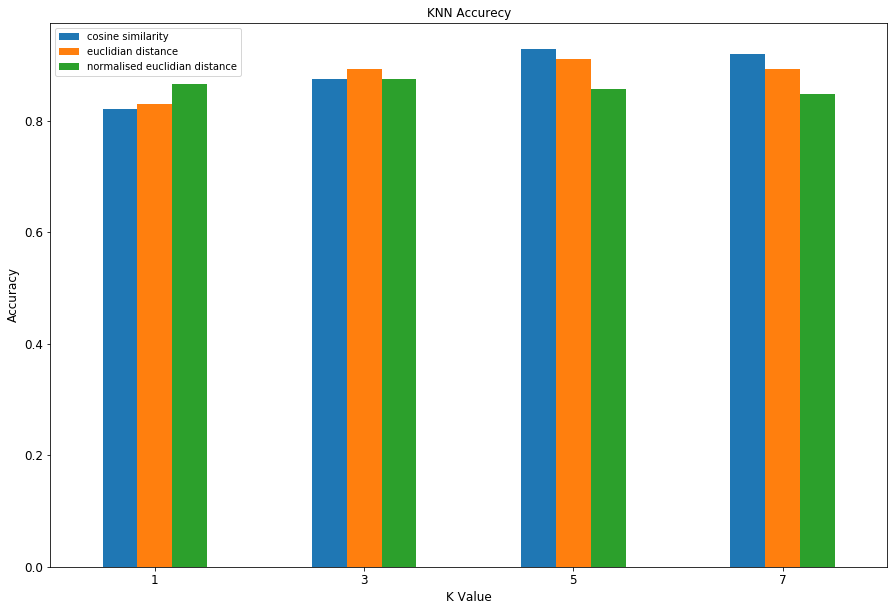

In [13]:

df = pd.DataFrame({'cosine similarity': cos_sim_accuracy,
                   'euclidian distance': euclid_dist_accuracy,
                   'normalised euclidian distance': norm_dist_accuracy}, index=K)
ax = df.plot(kind='bar', title ="KNN Accurecy", figsize=(15, 10), legend=True, fontsize=12, rot=0)
ax.set_xlabel("K Value", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
plt.show()

In [14]:
df.head()

,cosine similarity,euclidian distance,normalised euclidian distance
1,0.821429,0.830357,0.866071
3,0.875000,0.892857,0.875000
5,0.928571,0.910714,0.857143
7,0.919643,0.892857,0.848214


In [20]:
df.max(axis = 0)

cosine similarity                0.928571
euclidian distance               0.910714
normalised euclidian distance    0.875000
dtype: float64

# cosine similarity at K = 5 has the best accurecy of 0.928571. using these hyperparameter to calulate the final accuracy with test data

In [22]:
cos_sim_test_predictions = []   # to store predictions
correct = 0      


for row in test_df.iterrows():
    prediction = knn(row, dev_df, 5, cosine_similarity)
    cos_sim_test_predictions.append(prediction)

    #checking if prediction is correct.
    if prediction[-1] == row[1][-1]:
        correct += 1

cos_sim_accuracy = (correct/len(test_df))
cos_sim_accuracy

0.9473684210526315

# Final accuracy got with test data using K = 5 and cosine similarty function is .94737